INF2209

Topic Modelling for the Herman Melville Corpus

Paul King

996796506

Importing the corpus, pre-processing, and some exploratory data analysis

In [71]:
# Import the corpus

import pandas as pd
import os

text_list = []
files = os.listdir('melville_gutenberg_source')

for file in files[:-1]:
    text_file = open('melville_gutenberg_source\\' + file, "r", encoding="utf-8-sig")
    text_string = text_file.read()
    text_file.close()
    text_list.append([file[:-9],file[-8:-4],text_string])
print(len(text_list))

text_df = pd.DataFrame(text_list,columns=["file","year","text"]) # We'll store the novel/collection name and year of publication for future analysis
text_df.head()

12


file  year                                               text
0  appletree_stories  1922  *****THE APPLE-TREE TABLE\n\n_OR ORIGINAL SPIR...
1         confidence  1857  CHAPTER I.\n\nA MUTE GOES ABOARD A BOAT ON THE...
2       israelpotter  1855  CHAPTER I.\nTHE BIRTHPLACE OF ISRAEL.\n\n\nThe...
3             mardi2  1849  CHAPTER I.\nMaramma\n\n\nWe were now voyaging ...
4              mardi  1849  PREFACE\n\n\nNot long ago, having published tw...

In [70]:
# Calculate a rough wordcount for each book

def countwords(row):
    if type(row['text']) == str:
        return len(row["text"].split())
    else:
        return 0

text_df['wordcount'] = text_df.apply(lambda row: countwords(row), axis=1)
text_df[['file','wordcount']]

file  wordcount
0   appletree_stories      60004
1          confidence      92840
2        israelpotter      64481
3              mardi2     100192
4               mardi      96020
5            mobydick     208458
6                omoo     101139
7      piazza_stories      79225
8              pierre     151615
9             redburn     117915
10              typee      98019
11        whitejacket     138610

In [72]:
# Split stories and chapters into individual documents

chapters = []
for text_string in text_list:
    if text_string[0][-8:] == "_stories":
        stories = text_string[2].split('*****')
        for story in stories[1:]:
            chapters.append([text_string[0],text_string[1],story])

    else:
        stories = text_string[2].split('CHAPTER')
        for story in stories[1:]:
            chapters.append([text_string[0],text_string[1],story])



In [73]:
text_df = pd.DataFrame(chapters,columns=["file","year","text"])
text_df

file  year  \
0    appletree_stories  1922   
1    appletree_stories  1922   
2    appletree_stories  1922   
3    appletree_stories  1922   
4    appletree_stories  1922   
..                 ...   ...   
699        whitejacket  1850   
700        whitejacket  1850   
701        whitejacket  1850   
702        whitejacket  1850   
703        whitejacket  1850   

                                                  text  
0    THE APPLE-TREE TABLE\n\n_OR ORIGINAL SPIRITUAL...  
1    HAWTHORNE AND HIS MOSSES\n\n_BY A VIRGINIAN SP...  
2    JIMMY ROSE\n\n\nA time ago, no matter how long...  
3    I AND MY CHIMNEY\n\n\nI and my chimney, two gr...  
4    THE PARADISE OF BACHELORS AND THE TARTARUS OF ...  
..                                                 ...  
699   LXXXIX.\nTHE SOCIAL STATE IN A MAN-OF-WAR.\n\...  
700   XC.\nTHE MANNING OF NAVIES.\n\n\n“The gallows...  
701   XCI.\nSMOKING-CLUB IN A MAN-OF-WAR, WITH SCEN...  
702   XCII.\nTHE LAST OF THE JACKET.\n\n\nAlready h...  
703   XCIII.\nCABLE AND ANCHOR ALL CLEAR.\n\n\nAnd ...  

[704 rows x 3 columns]

Mean:1642.2414772727273
Median:1221.5
Standard Deviation:1890.2834221673074


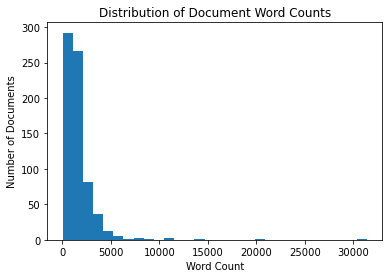

In [107]:
# Document word count
import matplotlib.pyplot as plt
import numpy as np

text_df['wordcount'] = text_df.apply(lambda row: countwords(row), axis=1)

plt.hist(text_df['wordcount'], bins = 30)
plt.title('Distribution of Document Word Counts')
plt.ylabel('Number of Documents')
plt.xlabel('Word Count')
print('Mean:' + str(np.mean(text_df['wordcount'])))
print('Median:' + str(np.median(text_df['wordcount'])))
print('Standard Deviation:' + str(np.std(text_df['wordcount'])))

In [111]:
text_df[text_df['wordcount'] > 10000] # What are the longest documents?

file  year  \
3    appletree_stories  1922   
511     piazza_stories  1856   
512     piazza_stories  1856   
514     piazza_stories  1856   
610              typee  1846   

                                                  text  \
3    I AND MY CHIMNEY\n\n\nI and my chimney, two gr...   
511  BARTLEBY.\n\n\nI am a rather elderly man. The ...   
512  BENITO CERENO.\n\n\nIn the year 1799, Captain ...   
514  THE ENCANTADAS; OR, ENCHANTED ISLES\n\n\nSKETC...   
610   XXXIII\n\n\n                               Th...   

                                        text_processed  \
3    [and, my, chimney, two, grey, headed, old, smo...   
511  [am, a, rather, elderly, man, the, nature, of,...   
512  [in, the, year, captain, amasa, delano, of, du...   
514  [that, may, not, be, said, then, the, ferryman...   
610  [the, escape, nearly, three, week, had, elapse...   

                                   text_processed_join  wordcount  
3    and my chimney two grey headed old smoker resi...      11335  
511  am a rather elderly man the nature of my avoca...      14315  
512  in the year captain amasa delano of duxbury in...      31401  
514  that may not be said then the ferryman least w...      20360  
610  the escape nearly three week had elapsed since...      10642

In [74]:
# Pre-processing pipeline to convert documents into word tokens

import re # Regex package
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Remove punctuation
text_df['text_processed'] = text_df['text'].map(lambda x: re.sub('[-\n]', ' ', x)).map(lambda x: re.sub('[_]', '', x))
text_df['text_processed'] = text_df['text_processed'].str.replace('[^\w\s]','')

# Remove any all-caps words; these are headings/titles, chapter numbers, other not-useful content
text_df['text_processed'] = text_df['text_processed'].map(lambda x: re.sub(r'\b[A-Z]+\b', '', x))

# Convert the titles to lowercase
text_df['text_processed'] = text_df['text_processed'].map(lambda x: x.lower())

# Remove numbers
text_df['text_processed'] = text_df['text_processed'].map(lambda x: re.sub('[^a-z]', ' ', x))

# Tokenize and lemmatize
wordnet_lemmatizer = WordNetLemmatizer()
text_df['text_processed'] = text_df['text_processed'].map(nltk.word_tokenize)
text_df['text_processed'] = text_df['text_processed'].map(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

text_df.head()

C:\Users\Paul K\AppData\Local\Temp\ipykernel_21196\3531390470.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text_processed'] = text_df['text_processed'].str.replace('[^\w\s]','')


file  year                                               text  \
0  appletree_stories  1922  THE APPLE-TREE TABLE\n\n_OR ORIGINAL SPIRITUAL...   
1  appletree_stories  1922  HAWTHORNE AND HIS MOSSES\n\n_BY A VIRGINIAN SP...   
2  appletree_stories  1922  JIMMY ROSE\n\n\nA time ago, no matter how long...   
3  appletree_stories  1922  I AND MY CHIMNEY\n\n\nI and my chimney, two gr...   
4  appletree_stories  1922  THE PARADISE OF BACHELORS AND THE TARTARUS OF ...   

                                      text_processed  
0  [when, first, saw, the, table, dingy, and, dus...  
1  [papered, chamber, in, a, fine, old, farmhouse...  
2  [time, ago, no, matter, how, long, precisely, ...  
3  [and, my, chimney, two, grey, headed, old, smo...  
4  [it, lie, not, far, from, temple, bar, going, ...

In [54]:
alltext = text_df['text_processed']
alltext=alltext.sum()

In [254]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

alltext = [word for word in alltext if word not in stop_words]
fdist = nltk.FreqDist(alltext) # Create a frequency distribution to identify the most common words

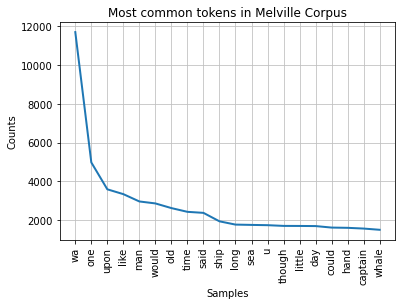

<AxesSubplot:title={'center':'Most common tokens in Melville Corpus'}, xlabel='Samples', ylabel='Counts'>

In [25]:
fdist.plot(20, title = "Most common tokens in Melville Corpus")

In [255]:
fdist.most_common(50)
[x for x,y in fdist.most_common(50)]


['wa',
 'one',
 'upon',
 'like',
 'man',
 'would',
 'old',
 'time',
 'said',
 'ship',
 'long',
 'sea',
 'u',
 'though',
 'little',
 'day',
 'could',
 'hand',
 'captain',
 'whale',
 'must',
 'thing',
 'good',
 'men',
 'yet',
 'two',
 'last',
 'way',
 'much',
 'still',
 'may',
 'ha',
 'many',
 'well',
 'every',
 'first',
 'never',
 'great',
 'head',
 'say',
 'thought',
 'round',
 'seemed',
 'made',
 'see',
 'come',
 'might',
 'eye',
 'among',
 'side']

In [253]:
# Remove common words without semantic importance

from nltk.corpus import stopwords
new_stoplist = ['wa', 'one', 'upon', 'would', 'said', 'u', 'though', 'could', 'must', 'thing', 'yet', 'two', 'last', 'way', 'much', 'still', 'may', 
'ha', 'many', 'well', 'every', 'first', 'never', 'great', 'say', 'thought', 'round', 'seemed', 'made', 'see', 'come', 'might', 'among', 'side',
'like','man','little','long']
stop_words = stopwords.words('english')
stop_words.extend(new_stoplist)

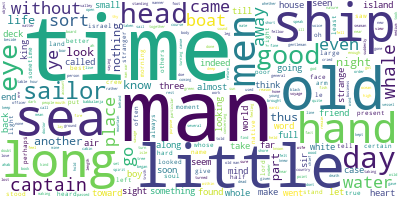

In [60]:
from wordcloud import WordCloud
alltext_string = ','.join([word for word in alltext if word not in stop_words])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(alltext_string)
wordcloud.to_image()


In [302]:
# Creating a dictionary and corpus for the topic models

import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(new_stoplist)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_words = text_df.text_processed.values.tolist()
data_words = remove_stopwords(data_words)

In [303]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [258]:
# We want a uniform way to retrieve Coherence, instead of using whatever metric algorithms the particular library uses
# Input is list of lists of top 20 words
# Because we are supplying only topic words and not weights, this model is "probability-naive"
# Testing this compared to inputting the model resulted in the exact same coherence values for NMF and LDA.
# Perhaps gensim's CoherenceModel doesn't use those weights regardless!

from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

def cohere(topic_list):
    cm = CoherenceModel(topics=topic_list, corpus=corpus, dictionary=id2word, coherence='u_mass')
    coh = cm.get_coherence()
    return coh


NMF Modelling

In [259]:
# We will loop our NMF model for 2-49 topics and take the Coherence scores for each

nmf_scores = []

for i in range(2,51):
    num_topics = i
    nmf_model = gensim.models.nmf.Nmf(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
    coherence = CoherenceModel(model=nmf_model, corpus=corpus, coherence='u_mass').get_coherence()
    show_topic = []
    for j in range(i):
        topic = nmf_model.show_topic(j,20)
        show_topic.append([x for x,y in topic])
    coh = cohere(show_topic)
    print(i, coh)
    nmf_scores.append([i, coh])

2 -0.9642312805248019
3 -1.1203496292478314
4 -1.0810748594283082
5 -1.1173780620334708
6 -1.0897807706503355
7 -1.2085356420752782
8 -0.9650401691561197
9 -1.4408390603749952
10 -1.6392022036694833
11 -1.3081176897357893
12 -1.2753649644626097
13 -1.415447556774105
14 -1.8404673008530634
15 -1.911960638331955
16 -1.5860046493849012
17 -1.739331900202632
18 -1.813073098291108
19 -1.5734793522329342
20 -1.8157052066188926
21 -1.529168830402313
22 -1.8704208410036633
23 -1.906669558602461
24 -1.7488658323881652
25 -1.807027230448477
26 -1.895323106029372
27 -1.9046311510673164
28 -1.8303070017527163
29 -1.64347136310074
30 -1.9083382296261249
31 -2.011347689573906
32 -1.9318895789429937
33 -1.7121205162201616
34 -2.0937119691532198
35 -1.9990723505546206
36 -2.107840767137576
37 -2.0578646080391088
38 -1.8433557101291904
39 -1.8803617791071814
40 -2.167128013428737
41 -1.778946422527975
42 -1.8133592284900637
43 -1.8587155268554076
44 -1.9507341619455365
45 -1.9685331971865876
46 -1.9978

In [267]:
nmf_scores_df = pd.DataFrame(nmf_scores,columns=["k","Coherence"])
nmf_scores_df.head()

k  Coherence
0  2  -0.964231
1  3  -1.120350
2  4  -1.081075
3  5  -1.117378
4  6  -1.089781

In [268]:
nmf_scores_df.to_csv('nmf_scores.csv',index=False) # Store results for later

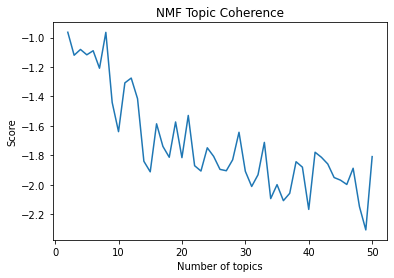

In [269]:
# Plot nmf coherence by number of topics
import matplotlib.pyplot as plt

nmf_c = pd.Series(nmf_scores_df.Coherence.values, index=nmf_scores_df.k.values)
plt.plot(nmf_c)
plt.title("NMF Topic Coherence")
plt.xlabel("Number of topics")
plt.ylabel("Score")
plt.show()

In [270]:
# Retrieve the topics for k = 5
pd.set_option('display.max_colwidth', None)
num_topics = 5

# Build nnmf model
nmf_model = gensim.models.nmf.Nmf(corpus=corpus, id2word=id2word, num_topics=num_topics)

nmf_topics = []
for i in range(5):
    topic = nmf_model.show_topic(i,10)
    nmf_topics.append([x for x,y in topic])
#nmf_topics
nmf_topics_df = pd.DataFrame(nmf_topics,index=range(1,6))
nmf_topics_df['words'] = nmf_topics_df.values.tolist()
nmf_topics_df = pd.DataFrame(nmf_topics_df['words'],index=range(1,6))
nmf_topics_df

words
1         [captain, ship, negro, delano, sea, boat, benito, time, hand, whale]
2                     [old, isle, time, sea, good, men, king, boat, day, ever]
3              [old, sir, friend, day, chimney, time, house, wife, poor, sort]
4  [captain, delano, negro, benito, black, ship, white, whale, time, spaniard]
5              [good, captain, hand, time, boy, even, ship, know, lord, place]

LDA Modelling

In [273]:
# We will loop our LDA model for 2-50 topics and take the Perplexity and Coherence scores for each
import gensim
from gensim.models import CoherenceModel

lda_scores = []

for i in range(2,51):
    num_topics = i
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
    perplexity = lda_model.log_perplexity(corpus)
    coherence = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass').get_coherence()
    show_topic = []
    for j in range(i):
        topic = lda_model.show_topic(j,20)
        show_topic.append([x for x,y in topic])
    coh = cohere(show_topic)
    # Comparing Gensim's CoherenceModel with inputting the model directly and inputting only topics; results were the same
    print(i, perplexity, coherence, coh)
    lda_scores.append([i, perplexity, coherence])

2 -8.991313037713601 -0.5281419963662218 -0.5281419963662218
3 -9.050827137464358 -0.5423699456690023 -0.5423699456690023
4 -9.1164690246188 -0.5396267362718367 -0.5396267362718367
5 -9.186015798742984 -0.5529905465126048 -0.5529905465126048
6 -9.25177014916472 -0.5509031730855957 -0.5509031730855957
7 -9.31916236245719 -0.5424256894594116 -0.5424256894594116
8 -9.382569905689051 -0.6136455358834767 -0.6136455358834767
9 -9.45674947697636 -0.6056723499094431 -0.6056723499094431
10 -9.519343010373154 -0.551590115489171 -0.551590115489171
11 -9.589625015300392 -0.5407805228053755 -0.5407805228053755
12 -9.661777395905828 -0.5612987534257704 -0.5612987534257704
13 -9.72686849600371 -0.5417668993415526 -0.5417668993415526
14 -9.78735059077845 -0.5451316305762408 -0.5451316305762408
15 -9.874501589176962 -0.5870609748083293 -0.5870609748083293
16 -9.949603022728546 -0.5614631568765519 -0.5614631568765519
17 -10.000602021833517 -0.5666103174322918 -0.5666103174322918
18 -10.089886571874262 -

In [274]:
lda_scores_df = pd.DataFrame(lda_scores,columns=["k","Perplexity","Coherence"])
lda_scores_df.head()

k  Perplexity  Coherence
0  2   -8.991313  -0.528142
1  3   -9.050827  -0.542370
2  4   -9.116469  -0.539627
3  5   -9.186016  -0.552991
4  6   -9.251770  -0.550903

In [275]:
lda_scores_df.to_csv('lda_scores.csv',index=False) # Store results for later

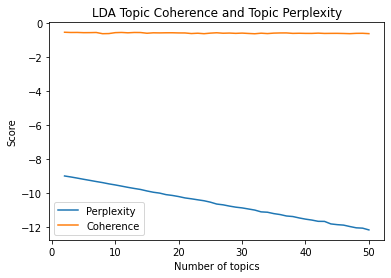

In [309]:
# Plot lda Perplexity score and coherence by number of topics
import matplotlib.pyplot as plt

lda_p = pd.Series(lda_scores_df.Perplexity.values, index=lda_scores_df.k.values)
lda_c = pd.Series(lda_scores_df.Coherence.values, index=lda_scores_df.k.values)
plt.plot(lda_p)
plt.plot(lda_c)
#maxdiff=lda_scores_df['k'][(lda_scores_df['Perplexity'] - lda_scores_df['Coherence']).idxmax()]
#mindiff=lda_scores_df['k'][(lda_scores_df['Perplexity'] - lda_scores_df['Coherence']).idxmin()]
#plt.axvline(x=maxdiff)
#plt.axvline(x=mindiff)
# Omitted min/max differences as they did not prove to be informative
plt.title("LDA Topic Coherence and Topic Perplexity")
plt.xlabel("Number of topics")
plt.ylabel("Score")
plt.legend(["Perplexity","Coherence"])
plt.show()

In [272]:
# Retrieve the topics for k = 5
pd.set_option('display.max_colwidth', None)
num_topics = 5

# Build lda model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes = 10)

lda_topics = []
for i in range(5):
    topic = lda_model.show_topic(i,10)
    lda_topics.append([x for x,y in topic])
#lda_topics
lda_topics_df = pd.DataFrame(lda_topics,index=range(1,6))
lda_topics_df['words'] = lda_topics_df.values.tolist()
lda_topics_df = pd.DataFrame(lda_topics_df['words'],index=range(1,6))
lda_topics_df

words
1  [old, time, ship, day, sea, captain, whale, hand, head, good]
2   [old, time, ship, hand, day, captain, good, men, sea, whale]
3   [old, ship, time, sea, captain, day, good, hand, men, whale]
4     [time, old, ship, sea, whale, good, day, water, hand, eye]
5   [old, time, day, men, hand, sea, ship, whale, captain, good]

Biterm Modelling

In [ ]:
import bitermplus as btm
import numpy as np
import pandas as pd

text_df['text_processed_join']= text_df['text_processed'].map(lambda x: ' '.join(x))
texts = text_df['text_processed_join'].str.strip().tolist()


X, vocabulary, vocab_dict = btm.get_words_freqs(texts, stop_words=stop_words, max_features=10000, binary=True)
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
biterms = btm.get_biterms(docs_vec)

In [ ]:
# We will loop our BTM model for 2-51 topics and take the Coherence scores for each
btm_scores = []
from gensim.models import CoherenceModel

for i in range(2,51):
    num_topics = i
    btm_model = btm.BTM(
        X, vocabulary, seed=1234, T=num_topics, M=20, alpha=50/8, beta=0.01)
    #p_zd = btm_model.transform(docs_vec) # Disabled document-topic matrix calculation due to constant kernel crashes
    btm_model.fit(biterms, iterations=20)
    #perplexity = btm.perplexity(btm_model.matrix_topics_words_, p_zd, X, 8)
    # perplexity values generated in-loop were not consistent with values outside of loop
    #coherence = btm.coherence(btm_model.matrix_topics_words_, X, M=20)
    
    btm_topics_df = pd.DataFrame(btm.get_top_topic_words(btm_model,words_num=20))
    btm_topics_df= btm_topics_df.transpose()
    show_topic = btm_topics_df.values.tolist()
    coh = cohere(show_topic)
    print(i,coh)
    btm_scores.append([i, coh])

100%|██████████| 20/20 [00:05<00:00,  3.82it/s]


2 -0.5597791457986373


100%|██████████| 20/20 [00:05<00:00,  3.34it/s]


3 -0.6325524358202154


100%|██████████| 20/20 [00:07<00:00,  2.85it/s]


4 -0.6360949143522033


100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


5 -0.6265567474625173


100%|██████████| 20/20 [00:08<00:00,  2.37it/s]


6 -0.6591985518528733


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


7 -0.7432249588487829


100%|██████████| 20/20 [00:10<00:00,  1.94it/s]


8 -0.7053140230639432


100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


9 -0.7016430560451309


100%|██████████| 20/20 [00:11<00:00,  1.74it/s]


10 -0.7253442172052497


100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


11 -0.7839093419438966


100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


12 -0.7596737151471186


100%|██████████| 20/20 [00:13<00:00,  1.51it/s]


13 -0.7641146558932562


100%|██████████| 20/20 [00:14<00:00,  1.43it/s]


14 -0.7267745093251816


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


15 -0.7209316961161191


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


16 -0.7896170929223506


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


17 -0.7172315331148695


100%|██████████| 20/20 [00:16<00:00,  1.18it/s]


18 -0.792127903881434


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


19 -0.7228177175075605


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


20 -0.7452272904912227


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


21 -0.7796379736691135


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


22 -0.770723284316001


100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


23 -0.7735420392369804


100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


24 -0.7856091151152406


100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


25 -0.7318787428927803


100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


26 -0.7930019576337141


100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


27 -0.7369806595417829


100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


28 -0.7985693951121805


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


29 -0.7760745961723593


100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


30 -0.7947149670215995


100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


31 -0.8003174096256482


100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


32 -0.8170417509334937


100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


33 -0.7978986980613936


100%|██████████| 20/20 [00:31<00:00,  1.57s/it]


34 -0.7732815580579274


100%|██████████| 20/20 [00:31<00:00,  1.59s/it]


35 -0.8228509006580841


100%|██████████| 20/20 [00:31<00:00,  1.60s/it]


36 -0.7575875207231425


100%|██████████| 20/20 [00:32<00:00,  1.61s/it]


37 -0.8206429209374462


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


38 -0.8006073433569957


100%|██████████| 20/20 [00:34<00:00,  1.72s/it]


39 -0.830543188914647


100%|██████████| 20/20 [00:35<00:00,  1.76s/it]


40 -0.8165362700406288


100%|██████████| 20/20 [00:35<00:00,  1.78s/it]


41 -0.8321661119968522


100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


42 -0.8431839396093009


100%|██████████| 20/20 [00:38<00:00,  1.93s/it]


43 -0.8169464023674056


100%|██████████| 20/20 [00:39<00:00,  1.96s/it]


44 -0.845243184821888


100%|██████████| 20/20 [00:40<00:00,  2.00s/it]


45 -0.8142959053075802


100%|██████████| 20/20 [00:41<00:00,  2.06s/it]


46 -0.8104701385212701


100%|██████████| 20/20 [00:41<00:00,  2.08s/it]


47 -0.8474152646268392


100%|██████████| 20/20 [00:43<00:00,  2.18s/it]


48 -0.8281136691781238


100%|██████████| 20/20 [00:43<00:00,  2.19s/it]


49 -0.820593802800417


100%|██████████| 20/20 [00:44<00:00,  2.24s/it]

50 -0.8112331765587824


In [ ]:
btm_scores_df = pd.DataFrame(btm_scores,columns=["k","Coherence"])
btm_scores_df.head()

k  Coherence
0  2  -0.559779
1  3  -0.632552
2  4  -0.636095
3  5  -0.626557
4  6  -0.659199

In [ ]:
btm_scores_df.to_csv('btm_scores.csv', index = False) # save results for later

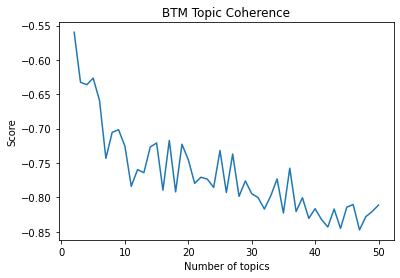

In [ ]:
import matplotlib.pyplot as plt
btm_c = pd.Series(btm_scores_df.Coherence.values, index=btm_scores_df.k.values)
plt.plot(btm_c)
plt.title("BTM Topic Coherence")
plt.xlabel("Number of topics")
plt.ylabel("Score")
plt.show()

In [ ]:
# Retrieve the topics for k = 5
pd.set_option('display.max_colwidth', None)
num_topics = 5

# Build BTM model
btm_model = btm.BTM(
    X, vocabulary, seed=12321, T=num_topics, M=20, alpha=50/8, beta=0.01)
btm_model.fit(biterms, iterations=20)
btm_topics_df = pd.DataFrame(btm.get_top_topic_words(btm_model,words_num=10))
btm_topics_df= btm_topics_df.transpose()
btm_topics_df['words'] = btm_topics_df.values.tolist()
btm_topics_df = pd.DataFrame(btm_topics_df['words'])
btm_topics_df

100%|██████████| 20/20 [00:07<00:00,  2.65it/s]


words
topic0     [whale, sea, ship, boat, hand, water, head, white, sail, time]
topic1   [captain, ship, time, men, sailor, war, day, sea, good, officer]
topic2           [old, good, know, sir, time, go, ye, let, think, friend]
topic3         [old, time, king, eye, tree, sea, day, medium, lord, head]
topic4  [time, old, day, ship, hand, deck, house, captain, place, israel]

In [ ]:
# Retrieve perplexity for  k = 5
num_topics = 5

# Build BTM model
btm_model = btm.BTM(
    X, vocabulary, seed=12321, T=num_topics, M=20, alpha=50/8, beta=0.01)
btm_model.fit(biterms, iterations=20)

p_zd = btm_model.transform(docs_vec)
perplexity = btm.perplexity(btm_model.matrix_topics_words_, p_zd, X, 8)
perplexity

100%|██████████| 704/704 [00:00<00:00, 3351.52it/s]


0.0005852272544440239

Unsupervised CorEx Modelling

In [278]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt

from sklearn.feature_extraction.text import CountVectorizer

In [279]:
text_df['text_processed_join']= text_df['text_processed'].map(lambda x: ' '.join(x))
texts = text_df['text_processed_join'].str.strip().tolist()

vectorizer =CountVectorizer(max_features=10000, binary=True) # Limit max features to 10000 to improve performance
doc_word = vectorizer.fit_transform(texts)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape

(704, 10000)

In [280]:
words = list(np.asarray(vectorizer.get_feature_names()))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [284]:
# Loop number of topics for 2-50 and return total correlation

corex_scores = []

for i in range(2,51):
    num_topics = i
    corex_model = ct.Corex(n_hidden=num_topics)
    corex_model.fit(doc_word, words = words)
    TC = corex_model.tc
    topics = corex_model.get_topics(n_words=20)
    show_topic = []
    for n,topic in enumerate(topics):
        topic_words,_,_ = zip(*topic)
        show_topic.append(list(topic_words))
    coh = cohere(show_topic)
    print(i,TC,coh)
    corex_scores.append([i,TC,coh])
    

2 90.42931530505939 -0.600969647624136
3 98.44531790616398 -0.7368020169841466
4 103.13693736335387 -0.6899968258294638
5 107.14473610499014 -1.2770352883985847
6 112.53048647580073 -1.358487895194887
7 114.03822073620942 -0.928196764383382
8 119.97959667743604 -1.0352040291761375
9 118.56053529157452 -1.0385769469913795
10 127.0167285219727 -1.3888278340867266
11 125.52941728058332 -0.9681351053890843
12 126.24245554863776 -1.1267286761275201
13 132.76638685160447 -1.15846547623491
14 129.71754697851136 -1.7232442381110264
15 133.16943854326715 -1.3112807764154757
16 134.9914335773678 -1.3105676286098218
17 134.5327773014197 -1.3498388572751272
18 138.93087738358534 -1.2774616682889475
19 138.35816261026963 -1.316886105696878
20 139.1223119228531 -1.3642983824483201
21 138.71081034453346 -1.278312811086588
22 144.46630068202765 -1.1871034607510695
23 142.9001829754017 -1.4702772903333095
24 143.59734991037197 -1.4621323814246707
25 141.22384179938615 -1.3945221834236003
26 145.0994164

In [287]:
corex_scores_df = pd.DataFrame(corex_scores,columns=["k","TC","Coherence"])
corex_scores_df.head()

k          TC  Coherence
0  2   90.429315  -0.600970
1  3   98.445318  -0.736802
2  4  103.136937  -0.689997
3  5  107.144736  -1.277035
4  6  112.530486  -1.358488

In [310]:
corex_scores_df.to_csv('corex_scores.csv') # Save for later

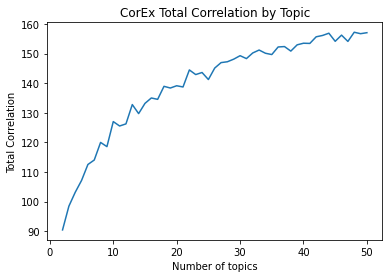

In [293]:
# Plot corex total correlation by number of topics
import matplotlib.pyplot as plt
%matplotlib inline

cor_p = pd.Series(corex_scores_df.TC.values, index=corex_scores_df.k.values)
plt.plot(cor_p)
#plt.axvline(x=26) # corresponds to K = 28
plt.title("CorEx Total Correlation by Topic")
plt.xlabel("Number of topics")
plt.ylabel("Total Correlation")
plt.show()

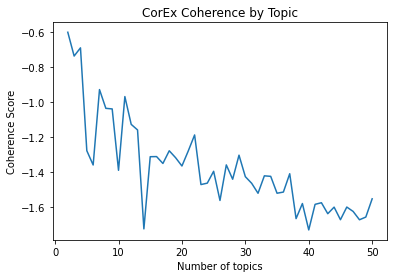

In [292]:
# Plot corex coherence by number of topics
import matplotlib.pyplot as plt
%matplotlib inline

cor_d = pd.Series(corex_scores_df.Coherence.values, index=corex_scores_df.k.values)
plt.plot(cor_d)
plt.title("CorEx Coherence by Topic")
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [294]:
# Calculating the total correlation per topic for k = 50

topic_model = ct.Corex(n_hidden=50)
topic_model.fit(doc_word, words = words)

Text(0.5, 1.0, 'Total Correlation per Topic')

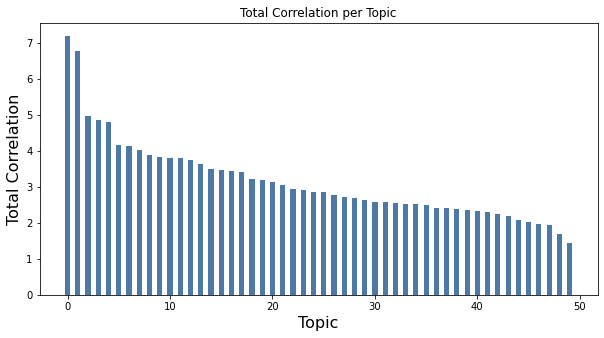

In [295]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16)
plt.title('Total Correlation per Topic')

In [281]:
# Topic words for k = 5

corex_model = ct.Corex(n_hidden=5)
corex_model.fit(doc_word, words = words)

In [283]:
topics = corex_model.get_topics(n_words=10)
topic_list = []
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    topic_list.append(topic_words)
corex_topics_df = pd.DataFrame(topic_list)
corex_topics_df['words'] = corex_topics_df.values.tolist()
corex_topics_df = pd.DataFrame(corex_topics_df['words'])
corex_topics_df

words
0          [give, having, such, should, once, put, little, least, being, did]
1    [several, quite, during, two, however, case, indeed, fellow, very, most]
2    [towards, around, suddenly, again, those, whose, air, voice, hand, wild]
3           [sight, after, only, first, while, away, half, every, foot, over]
4  [deck, ship, crew, sailor, captain, seaman, mate, mast, forecastle, cabin]

Supervised CorEx

In [296]:
anchor_words = [["prefer"],["sailor"],["time"]]

anchored_topic_model = ct.Corex(n_hidden=5, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [297]:
topics = anchored_topic_model.get_topics(n_words=10)
topic_list = []
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    topic_list.append(topic_words)
corex_topics_df = pd.DataFrame(topic_list)
corex_topics_df['words'] = corex_topics_df.values.tolist()
corex_topics_df = pd.DataFrame(corex_topics_df['words'])
corex_topics_df

words
0  [prefer, appeared, manner, truth, fact, moral, nature, understand, subject, trust]
1             [sailor, deck, ship, captain, crew, officer, mate, board, medium, main]
2                    [time, put, well, under, about, such, very, being, going, after]
3                           [shall, can, come, may, your, let, again, why, how, mean]
4   [towards, suddenly, whose, immediately, seemed, sight, moment, only, saw, effect]

In [301]:
anchored_topic_model.tc
topics = anchored_topic_model.get_topics(n_words=20)
show_topic = []
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    show_topic.append(list(topic_words))
coh = cohere(show_topic)
print("TC = " + str(anchored_topic_model.tc) + "\t\tCoherence = " + str(coh))

TC = 111.43118728671536		Coherence = -1.3104050711102748


Text(0.5, 1.0, 'Total Correlation per Topic')

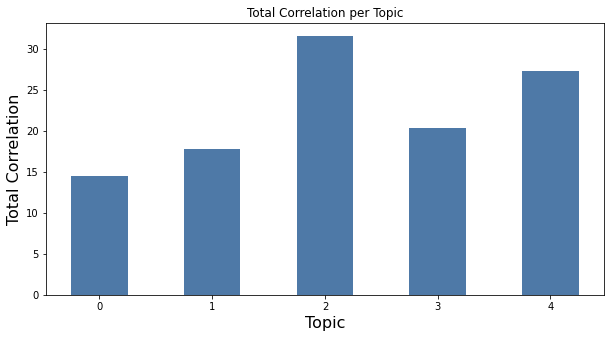

In [299]:
plt.figure(figsize=(10,5))
plt.bar(range(anchored_topic_model.tcs.shape[0]), anchored_topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16)
plt.title('Total Correlation per Topic')